# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!

Bad key text.latex.preview in file C:\Users\User\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\User\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\Us

In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("news_api")

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
Bitcoin_news = newsapi.get_everything(q="bitcoin",language="en")
# Total number of Bitcoin news
Bitcoin_news["totalResults"]

9371

In [5]:
# Fetch the Ethereum news articles
Ethereum_news = newsapi.get_everything(q="ethereum",language="en")
# Total number of Ethereum news
Ethereum_news["totalResults"]

4989

In [6]:
# Function to create a dataframe for news
def create_df(news):
    articles = []
    for article in news:
        try:
            title = article["title"]
            description = article["description"]
            text = article["content"]
            date = article["publishedAt"][:10]

            articles.append({
                "title": title,
                "description": description,
                "text": text,
                "date": date,
            })
        except AttributeError:
            pass

    return pd.DataFrame(articles)

In [7]:
# Create a DataFrame with the news
Bitcoin_df = create_df(Bitcoin_news["articles"])
Ethereum_df = create_df(Ethereum_news["articles"])

In [8]:
# Sentiment calculation based on compound score
def get_sentiment(score):
    result = 0
    if score >= 0.05:
        result = 1
    elif score <= -0.05:
        result = -1
    return result

In [9]:
# Bitcoin Sentiment scores dictionaries
text_sent = {"text_compound": [],"text_pos": [],"text_neu": [],"text_neg": [],"text_sent": [],}
# Get sentiment for the text
for index, row in Bitcoin_df.iterrows():
    try:        
        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

In [10]:
# Create the Bitcoin sentiment scores DataFrame
text_sentiment_df = pd.DataFrame(text_sent)
Bitcoin_df = Bitcoin_df.join(text_sentiment_df)
Bitcoin_df.head()

,title,description,text,date,text_compound,text_pos,text_neu,text_neg,text_sent
0,Miami’s Bitcoin Conference Left a Trail of Har...,"For some women, inappropriate conduct from oth...","Now, even though there are a number of women-f...",2022-05-10,0.0772,0.036,0.964,0.000,1
1,Why fossil fuel companies see green in Bitcoin...,ExxonMobil and other fossil fuel companies hav...,A Bitcoin mining site powered by otherwise los...,2022-05-04,-0.0516,0.056,0.882,0.061,-1
2,Wikipedia editors vote to block cryptocurrency...,Wikipedia editors have voted in favor of dropp...,Wikipedia editors have voted in favor of dropp...,2022-04-14,0.4019,0.088,0.912,0.000,1
3,Warren Buffett Says He Wouldn't Take All the B...,Warren Buffett has always been a bitcoin skept...,Warren Buffett has always been a bitcoin skept...,2022-05-02,-0.3269,0.085,0.772,0.143,-1
4,Bitcoin value drops by 50% since November peak,The slide in the value of cryptocurrencies com...,"Image source, Getty Images\r\nThe value of Bit...",2022-05-09,0.3400,0.072,0.928,0.000,1


In [11]:
# Ethereum Sentiment scores dictionaries
text_sent = {"text_compound": [],"text_pos": [],"text_neu": [],"text_neg": [],"text_sent": [],}
# Get sentiment for the text
for index, row in Ethereum_df.iterrows():
    try:        
        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

In [12]:
# Create the Ethereum sentiment scores DataFrame
text_sentiment_df = pd.DataFrame(text_sent)
Ethereum_df = Ethereum_df.join(text_sentiment_df)
Ethereum_df.head()

,title,description,text,date,text_compound,text_pos,text_neu,text_neg,text_sent
0,US blames North Korean hacker group for $625 m...,The US Department of Treasury has attributed t...,The US Department of Treasury says Lazarus is ...,2022-04-14,-0.7845,0.088,0.681,0.231,-1
1,Wikipedia community votes to stop accepting cr...,Critics argue the bitcoin and ethereum network...,"18 with 15 posters participating, including st...",2022-04-13,0.1027,0.084,0.844,0.071,1
2,Here's what NFTs look like on Instagram,Meta has revealed more of how NFTs will work o...,Meta has revealed more of how NFTs will work o...,2022-05-10,0.6486,0.135,0.865,0.000,1
3,Opera's crypto browser is now available on iOS,"Opera launched its dedicated ""Crypto Browser"" ...","Opera launched its dedicated ""Crypto Browser"" ...",2022-04-15,0.7351,0.188,0.812,0.000,1
4,Yuga Labs apologises after sale of virtual lan...,Demand for plots of land in multiplayer game O...,A multi-billion dollar cryptocurrency company ...,2022-05-02,-0.2263,0.046,0.879,0.075,-1


In [13]:
# Describe the Bitcoin Sentiment
Bitcoin_df.describe()

,text_compound,text_pos,text_neu,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.004840,0.066750,0.872550,0.060700,0.000000
std,0.385859,0.064594,0.090583,0.061425,1.025978
min,-0.549900,0.000000,0.557000,0.000000,-1.000000
25%,-0.335475,0.000000,0.852250,0.000000,-1.000000
50%,0.012800,0.064000,0.891000,0.063000,0.000000
75%,0.254725,0.085000,0.924250,0.077000,1.000000
max,0.750600,0.202000,0.964000,0.241000,1.000000


In [14]:
# Describe the Ethereum Sentiment
Ethereum_df.describe()

,text_compound,text_pos,text_neu,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000
mean,-0.081860,0.053050,0.877900,0.069000,-0.250000
std,0.481385,0.064728,0.074939,0.072897,0.966546
min,-0.784500,0.000000,0.681000,0.000000,-1.000000
25%,-0.381800,0.000000,0.827250,0.000000,-1.000000
50%,-0.273200,0.023000,0.899500,0.063000,-1.000000
75%,0.303775,0.085000,0.935500,0.077750,1.000000
max,0.735100,0.188000,1.000000,0.233000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin had the highest mean positive score which was 0.06675.

Q: Which coin had the highest compound score?

A: Bitcoin had the highest compound score which was 0.7506.

Q. Which coin had the highest positive score?

A: Bitcoin had the highest positive score which was 0.202.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [15]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [16]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_addons = {'said', 'sent', 'found', 'including', 'today', 'announced', 'week', 'basically', 'also'}

In [17]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    # Remove the stop words
    sw = set(stopwords.words('english'))
    sw_addons = {'said', 'sent', 'found', 'including', 'today', 'announced', 'week', 'basically', 'also'}
    # Convert the words to lowercase
    output = [word.lower() for word in lem if word.lower() not in sw]
    
    return output

In [18]:
# Create a new tokens list for Bitcoin
text = str(Bitcoin_df["text"])
print(set(tokenizer(text)))

{'amc', 'used', 'number', 'vegas', 'object', 'buffett', 'favor', 'fell', 'unite', 'adopted', 'theater', 'movie', 'wikipedia', 'dropp', 'african', 'mining', 'mexican', 'july', 'sometimes', 'drop', 'including', 'ever', 'bitcoin', 'skept', 'n', 'youve', 'warren', 'womenf', 'browser', 'last', 'rnfrom', 'central', 'editor', 'platform', 'cryptocurrency', 'bit', 'pledg', 'like', 'value', 'launched', 'though', 'voted', 'dramatic', 'scant', 'bitconame', 'bitcoins', 'image', 'level', 'reuters', 'north', 'los', 'chain', 'dogecoiners', 'otherwise', 'participating', 'restaurant', 'opera', 'powered', 'london', 'even', 'st', 'experienc', 'mixer', 'rose', 'text', 'lowest', 'crypto', 'source', 'site', 'ha', 'dropped', 'btc', 'introducing', 'always', 'dtype', 'imagesrnthe', 'poster', 'republic', 'dedicated', 'posted', 'april', 'may', 'since', 'felt', 'getty'}


In [19]:
# Create a new tokens list for Ethereum
etext = str(Ethereum_df["text"])
print(set(tokenizer(etext)))

{'project', 'amc', 'ukrainian', 'creator', 'object', 'department', 'meta', 'creat', 'fell', 'unite', 'computer', 'yuga', 'theater', 'ago', 'movie', 'help', 'day', 'bored', 'ape', 'leading', 'one', 'front', 'treasury', 'company', 'multibillion', 'week', 'ethereum', 'including', 'bitcoin', 'cryptocurr', 'browser', 'newsa', 'new', 'metaverse', 'cryptocurrency', 'labs', 'club', 'ether', 'early', 'sold', 'theres', 'problem', 'want', 'upgrade', 'editorial', 'launched', 'make', 'dollar', 'reuters', 'lazarus', 'independencewe', 'software', 'chain', 'thats', 'nfts', 'pri', 'dogecoiners', 'name', 'participating', 'opera', 'yacht', 'work', 'us', 'st', 'rose', 'text', 'developer', 'crypto', 'first', 'emerge', 'say', 'revealed', 'ha', 'promised', 'dropped', 'dtype', 'poster', 'preparing', 'dedicated', 'bot', 'former', 'april', 'may', 'bee', 'wrote'}


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [20]:
from collections import Counter
from nltk import ngrams

In [21]:
# Generate the Bitcoin N-grams where N=2
bigram_counts = Counter(ngrams(tokenizer(text), n=2))
print(dict(bigram_counts))

{('even', 'though'): 1, ('though', 'number'): 1, ('number', 'womenf'): 1, ('womenf', 'bitcoin'): 1, ('bitcoin', 'mining'): 1, ('mining', 'site'): 1, ('site', 'powered'): 1, ('powered', 'otherwise'): 1, ('otherwise', 'los'): 1, ('los', 'wikipedia'): 1, ('wikipedia', 'editor'): 1, ('editor', 'voted'): 1, ('voted', 'favor'): 1, ('favor', 'dropp'): 1, ('dropp', 'warren'): 1, ('warren', 'buffett'): 1, ('buffett', 'ha'): 1, ('ha', 'always'): 1, ('always', 'bitcoin'): 1, ('bitcoin', 'skept'): 1, ('skept', 'image'): 1, ('image', 'source'): 1, ('source', 'getty'): 1, ('getty', 'imagesrnthe'): 1, ('imagesrnthe', 'value'): 1, ('value', 'bit'): 1, ('bit', 'youve'): 1, ('youve', 'ever'): 1, ('ever', 'felt'): 1, ('felt', 'like'): 1, ('like', 'introducing'): 1, ('introducing', 'vegas'): 1, ('vegas', 'cryptocurrency'): 1, ('cryptocurrency', 'mixer'): 1, ('mixer', 'sometimes'): 1, ('sometimes', 'used'): 1, ('used', 'april'): 1, ('april', 'reuters'): 2, ('reuters', 'crypto'): 1, ('crypto', 'platform'): 

In [22]:
# Generate the Ethereum N-grams where N=2
bigram_counts = Counter(ngrams(tokenizer(etext), n=2))
print(dict(bigram_counts))

{('us', 'department'): 1, ('department', 'treasury'): 1, ('treasury', 'say'): 1, ('say', 'lazarus'): 1, ('lazarus', 'poster'): 1, ('poster', 'participating'): 1, ('participating', 'including'): 1, ('including', 'st'): 1, ('st', 'meta'): 1, ('meta', 'ha'): 1, ('ha', 'revealed'): 1, ('revealed', 'nfts'): 1, ('nfts', 'work'): 1, ('work', 'opera'): 1, ('opera', 'launched'): 1, ('launched', 'dedicated'): 1, ('dedicated', 'crypto'): 1, ('crypto', 'browser'): 1, ('browser', 'multibillion'): 1, ('multibillion', 'dollar'): 1, ('dollar', 'cryptocurrency'): 1, ('cryptocurrency', 'company'): 1, ('company', 'bored'): 1, ('bored', 'ape'): 1, ('ape', 'yacht'): 1, ('yacht', 'club'): 1, ('club', 'creator'): 1, ('creator', 'yuga'): 1, ('yuga', 'labs'): 1, ('labs', 'newsa'): 1, ('newsa', 'former'): 1, ('former', 'developer'): 1, ('developer', 'cryptocurr'): 1, ('cryptocurr', 'april'): 1, ('april', 'reuters'): 2, ('reuters', 'ether'): 1, ('ether', 'ha'): 1, ('ha', 'promised'): 1, ('promised', 'ethereum'):

In [23]:
# Function token_count generates the top 10 words for a given coin
def token_counter(text,n): 
    # Combine all articles in corpus into one large string
    processed = tokenizer(text)
    bigrams = ngrams(processed, n=n)
    top_10 = dict(Counter(bigrams).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['token', 'count'])

In [24]:
# Use token_count to get the top 10 words for Bitcoin
token_counter(text,3)

,token,count
0,"(may, reuters, bitcoin)",4
1,"(reuters, bitcoin, dropped)",2
2,"(even, though, number)",1
3,"(though, number, womenf)",1
4,"(number, womenf, bitcoin)",1
5,"(womenf, bitcoin, mining)",1
6,"(bitcoin, mining, site)",1
7,"(mining, site, powered)",1
8,"(site, powered, otherwise)",1
9,"(powered, otherwise, los)",1


In [25]:
# Use token_count to get the top 10 words for Ethereum
token_counter(etext,3)

,token,count
0,"(may, reuters, bitcoin)",3
1,"(reuters, bitcoin, dropped)",2
2,"(us, department, treasury)",1
3,"(department, treasury, say)",1
4,"(treasury, say, lazarus)",1
5,"(say, lazarus, poster)",1
6,"(lazarus, poster, participating)",1
7,"(poster, participating, including)",1
8,"(participating, including, st)",1
9,"(including, st, meta)",1


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

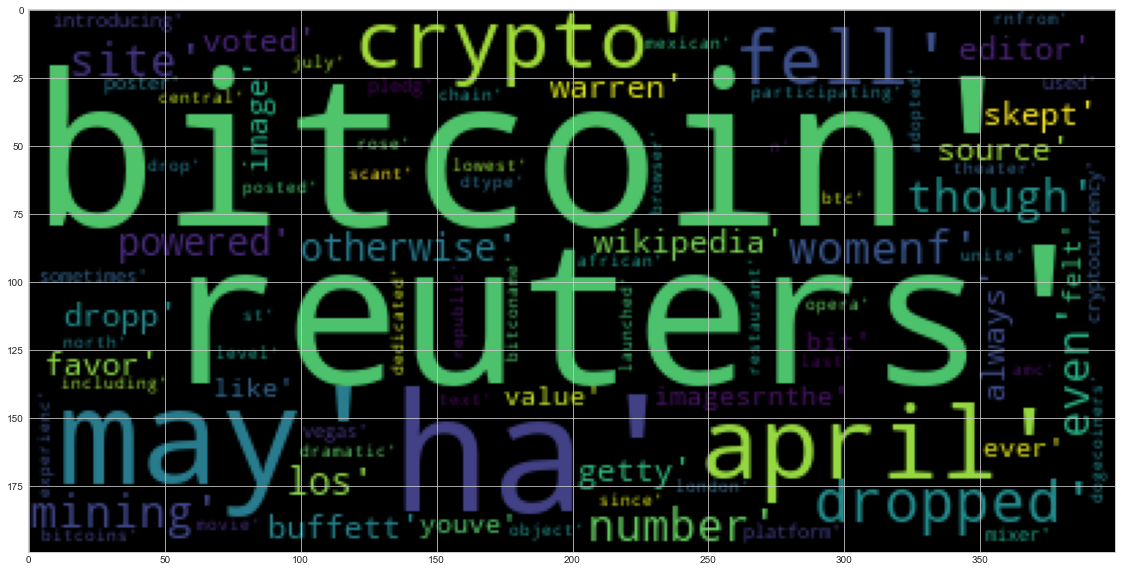

In [27]:
# Generate the Bitcoin word cloud
str_text= str(tokenizer(text))
wc = WordCloud().generate(str_text)
plt.imshow(wc)

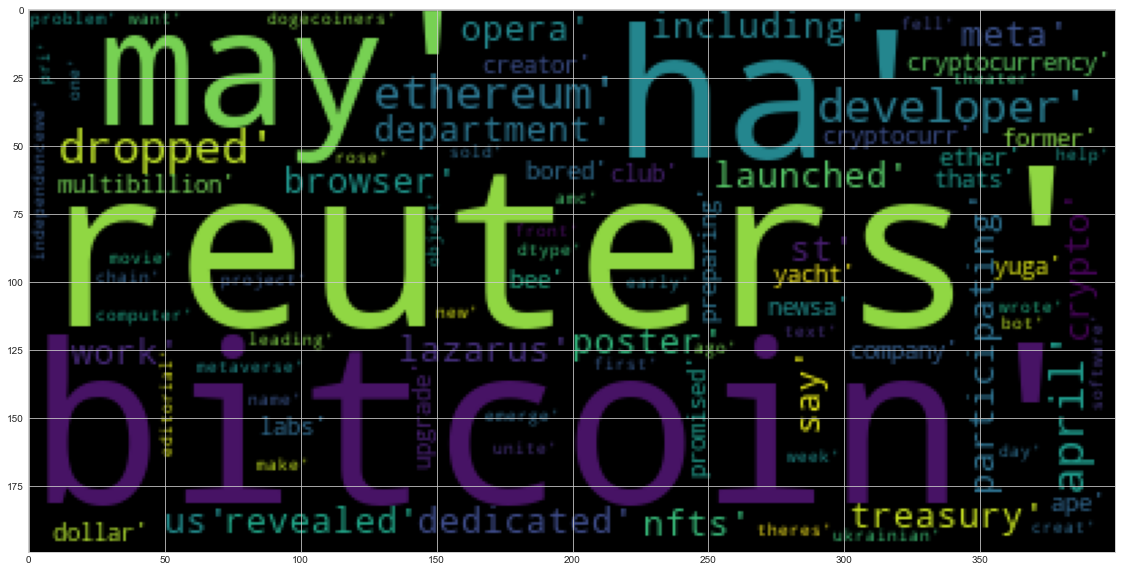

In [28]:
# Generate the Ethereum word cloud
str_etext= str(tokenizer(etext))
ewc = WordCloud().generate(str_etext)
plt.imshow(ewc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [29]:
import spacy
from spacy import displacy

In [30]:
# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

---
### Bitcoin NER

In [31]:
# Concatenate all of the Bitcoin text together
Bitcoin_conca = ' '.join(Bitcoin_df["text"])

In [32]:
# Run the NER processor on all of the text
doc=nlp(Bitcoin_conca)

In [33]:
# Render the visualization
displacy.render(doc, style='ent')

In [34]:
# List all Entities
print([ent.text for ent in doc.ents])

['Odeniran', 'Linden', 'Texas', 'April 4th, 2022', 'Photo', 'FRANCOIS PICARD/AFP', 'Getty Images', 'Wikipedia', "the Wikimedia Foundation's", 'Ars Technica', 'GorillaWarfare', 'Warren Buffett', 'the weekend', 'Getty Images\r\n', 'the weekend', '34,000', '27,630', 'Coinbase', '+2164', 'Last week', 'Fidelity Investments', 'the US Treasury', 'April 12', 'Reuters', '$10 billion', '18', '15', 'More than 200', 'Wikipedia', 'the Wikimedia Foundation', 'last July', '33,000', 'the week', 'last week', 'Fed', 'April 26', 'Reuters', '5.1%', '38,391.36', 'Tuesday', '2,229.82', '16%', 'year', 'May 4', 'Reuters', '5.7%', '39,862.84', 'Wednesday', '2,102.94', '20.9%', 'year', 'Bitcoin', 'Gucci handbag', 'week', 'Kristy Kilburn', 'May 11', 'Reuters', '7.23%', '28,758.29', 'GMT', 'Wednesday', '2,241.68', '40.4%', 'May 9', 'Reuters', '7.81%', '31,333.41', 'GMT', 'Monday', '2,655.98', '35%', 'AMC', 'April 15', 'AMC', 'Adam Aron', 'Mexican', 'North London', 'a few weeks ago', '+2779', 'Opera', 'Crypto Brow

---

### Ethereum NER

In [35]:
# Concatenate all of the Ethereum text together
Ethereum_conca = ' '.join(Ethereum_df["text"])

In [36]:
# Run the NER processor on all of the text
edoc=nlp(Ethereum_conca)

In [37]:
# Render the visualization
displacy.render(edoc, style='ent')

In [38]:
# List all Entities
print([ent.text for ent in edoc.ents])

['The US Department of Treasury', 'The US Treasury Department', 'North Korean', '$625 million', 'Ronin', '18', '15', 'More than 200', 'Wikipedia', 'the Wikimedia Foundation', '+4016', 'Instagram', 'US', 'Instagram', 'Crypto Browser', 'January', 'Windows, Mac', 'Android', 'Ethereum', 'Yuga Labs', 'Yacht Club', 'Yuga Labs', 'Otherside NFT', 'April 30', 'NFT', '+6669', 'Ethereum', 'more than five years', '100,000', 'North Korea', 'US', 'NBC News', 'Reuters', 'No.2', 'second', 'AMC', 'April 15', 'AMC', 'Adam Aron', 'Last night', 'Bloomberg', 'nearly a third', 'a billion dollars', 'Early this week', 'the Ukrainian Computer Emergency Response Team', 'Slovakian', 'Russia', '47,454', '34,007', '28%.About a third', 'this week', 'Ethereum', 'Merge', 'a few months after June', 'first', 'a year and a half ago', 'The Order Flow', 'Dan Robinson', "Georgios Konstantopoulos'", 'August 20', 'April 26', 'Reuters', '5.1%', '38,391.36', 'Tuesday', '2,229.82', '16%', 'year', 'May 4', 'Reuters', '5.7%', '39

---